<a href="https://colab.research.google.com/github/srujannayak32/MLLAB189/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task:1 comparing single Decision Tree and Ensembled Random Forest Classifier

In [31]:
# Task 1: Decision Tree vs Random Forest
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation function
def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print()

print("Decision Tree:")
evaluate(y_test, y_pred_dt)

print("Random Forest:")
evaluate(y_test, y_pred_rf)

# Effect of number of estimators
for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    print(f"n_estimators={n}, Accuracy={rf.score(X_test, y_test):.3f}")

Decision Tree:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

n_estimators=10, Accuracy=1.000
n_estimators=50, Accuracy=1.000
n_estimators=100, Accuracy=1.000
n_estimators=200, Accuracy=1.000


1.Differences between Decision Tree and Random Forest results?

Decision Tree often overfits the training data → high train accuracy, lower test accuracy.

Random Forest averages multiple trees → more stable, higher test accuracy, less variance.

2.Effect of increasing the number of estimators?

More trees → better performance, reduced variance, more stable predictions.

Beyond a certain point, improvement slows.

3.Why does Random Forest perform better than a single Decision Tree?

It reduces variance by averaging multiple uncorrelated trees.

Randomly selects features → prevents overfitting.

Captures diverse patterns that a single tree might miss

Task 2 Implementing Simple Ensemble Techniques

In [32]:
# Task 2: Max Voting, Average Voting, Weighted Voting
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Base models
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Hard Voting (Max Voting)
voting_hard = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('knn', knn)], voting='hard')

# Soft Voting (Average Voting)
voting_soft = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('knn', knn)], voting='soft')

# Weighted Soft Voting
voting_weighted = VotingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('knn', knn)],
    voting='soft',
    weights=[2, 1, 1])

models = [lr, dt, knn, voting_hard, voting_soft, voting_weighted]

for model in models:
    model.fit(X_train, y_train)
    print(model.__class__.__name__, "Accuracy:", model.score(X_test, y_test))

LogisticRegression Accuracy: 1.0
DecisionTreeClassifier Accuracy: 1.0
KNeighborsClassifier Accuracy: 1.0
VotingClassifier Accuracy: 1.0
VotingClassifier Accuracy: 1.0
VotingClassifier Accuracy: 1.0


1.Variation of results between max, average, and weighted voting?

Max voting = majority label → may ignore confidence.

Average voting = averages probabilities → smoother, sometimes better accuracy.

Weighted voting = gives higher-performing models more influence → usually highest accuracy.

2.Role of weights?

Emphasize models that are more reliable → reduces errors from weak models.

3.Which base classifiers combine most effectively?

Diverse models (linear + nonlinear) combine best.

Example: Decision Tree + Logistic Regression + KNN → complementary errors.

Task:3 Hard Voting vs. Soft Voting Classifiers

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Base models
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Voting types
voting_hard = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('knn', knn)], voting='hard')
voting_soft = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('knn', knn)], voting='soft')

for clf in [lr, dt, knn, voting_hard, voting_soft]:
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, "Accuracy:", clf.score(X_test, y_test))

print("Hard Voting:", voting_hard.score(X_test, y_test))
print("Soft Voting:", voting_soft.score(X_test, y_test))

LogisticRegression Accuracy: 1.0
DecisionTreeClassifier Accuracy: 1.0
KNeighborsClassifier Accuracy: 1.0
VotingClassifier Accuracy: 1.0
VotingClassifier Accuracy: 1.0
Hard Voting: 1.0
Soft Voting: 1.0


1.Main difference between hard and soft voting?

Hard voting → majority vote of predicted labels.

Soft voting → averages predicted probabilities, uses model confidence.

2.When does soft voting outperform hard voting?

When base classifiers are well-calibrated and have varying confidence levels.

3.How does probability calibration influence soft voting?

Better-calibrated probabilities → soft voting can make more accurate final predictions.

Task:4 Exploring Bagging Technique (Random Forest)

In [34]:
#Exploring Bagging Technique using RandomForestClassifier
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different values for n_estimators and max_depth
results = []

for n in [5, 10, 50, 100, 200]:       # number of trees
    for depth in [None, 3, 5, 8]:     # maximum depth of each tree
        rf = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({"n_estimators": n, "max_depth": depth, "accuracy": acc})

# Display results
df_results = pd.DataFrame(results)
print(df_results)

# Find best result
best = df_results.loc[df_results['accuracy'].idxmax()]
print("\nBest Parameters:")
print(best)

# Example: comparing with a single Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nSingle Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Handle None value for max_depth correctly
best_max_depth = int(best['max_depth']) if not np.isnan(best['max_depth']) else None

rf_best = RandomForestClassifier(n_estimators=int(best['n_estimators']),
                                 max_depth=best_max_depth, random_state=42)
rf_best.fit(X_train, y_train)
print("Best Random Forest Accuracy:", rf_best.score(X_test, y_test))

    n_estimators  max_depth  accuracy
0              5        NaN       1.0
1              5        3.0       1.0
2              5        5.0       1.0
3              5        8.0       1.0
4             10        NaN       1.0
5             10        3.0       1.0
6             10        5.0       1.0
7             10        8.0       1.0
8             50        NaN       1.0
9             50        3.0       1.0
10            50        5.0       1.0
11            50        8.0       1.0
12           100        NaN       1.0
13           100        3.0       1.0
14           100        5.0       1.0
15           100        8.0       1.0
16           200        NaN       1.0
17           200        3.0       1.0
18           200        5.0       1.0
19           200        8.0       1.0

Best Parameters:
n_estimators    5.0
max_depth       NaN
accuracy        1.0
Name: 0, dtype: float64

Single Decision Tree Accuracy: 1.0
Best Random Forest Accuracy: 1.0


1.Effect of n_estimators and max_depth?

More trees → better stability, reduced variance.

Shallower trees → lower overfitting; very deep trees → high accuracy but risk overfitting.

2.What does Bagging achieve?

Reduces variance, increases stability, minor effect on bias.

3.Random Forest vs. single Decision Tree in overfitting?

Random Forest averages multiple trees → smoother, less overfitting than one deep Decision Tree.

Task:5 Using Random Forest Regressor and OOB Score

In [24]:
#Using RandomForestRegressor and OOB Score

# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Load a regression dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different numbers of estimators (trees)
results = []

for n in [10, 50, 100, 200]:
    rf_reg = RandomForestRegressor(
        n_estimators=n,
        oob_score=True,          # enable Out-Of-Bag score
        n_jobs=-1,               # use all cores for faster training
        random_state=42,
        bootstrap=True           # must be True for OOB to work
    )
    rf_reg.fit(X_train, y_train)

    # Predictions and metrics
    y_pred = rf_reg.predict(X_test)
    test_r2 = r2_score(y_test, y_pred)
    oob = rf_reg.oob_score_
    results.append({"n_estimators": n, "OOB Score": oob, "Test R2": test_r2})

# Show results
df = pd.DataFrame(results)
print(df)

# Example: best model
best_model = df.loc[df['Test R2'].idxmax()]
print("\nBest Model Configuration:")
print(best_model)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


   n_estimators  OOB Score   Test R2
0            10   0.683727  0.782926
1            50   0.794070  0.803644
2           100   0.800922  0.804573
3           200   0.805441  0.806819

Best Model Configuration:
n_estimators    200.000000
OOB Score         0.805441
Test R2           0.806819
Name: 3, dtype: float64


1.What does oob_score_ indicate?

Measures performance on unseen samples during training → internal cross-validation estimate.

2.Difference from traditional test-set evaluation?

OOB uses unused training samples automatically.

Test-set evaluation uses separate held-out data.

3.OOB score with different numbers of trees?

Few trees → noisy, unstable OOB score.

More trees → OOB score improves and stabilizes.

Task 6 Exploring Boosting Techniques

In [25]:
#Exploring Boosting Techniques

# Import libraries
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, r2_score

# Extra packages for advanced boosters
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#ADABOOST (Binary Classification)
print("=== AdaBoost (Binary Classification) ===")
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))

#GRADIENT BOOSTING (Classification)
print("\n=== Gradient Boosting (Classification) ===")
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

# GRADIENT BOOSTING (Regression)
print("\n=== Gradient Boosting (Regression) ===")
Xr, yr = fetch_california_housing(return_X_y=True)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, random_state=42)

gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_reg.fit(Xr_train, yr_train)
yr_pred = gb_reg.predict(Xr_test)
print("Gradient Boosting Regressor R²:", r2_score(yr_test, yr_pred))

#XGBOOST (Extreme Gradient Boosting)
print("\n=== XGBoost ===")
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

#CATBOOST
print("\n=== CatBoost ===")
cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))

print("\n=== Summary ===")
print("AdaBoost:", accuracy_score(y_test, y_pred))
print("GradientBoost (Class):", accuracy_score(y_test, y_pred_gb))
print("XGBoost:", accuracy_score(y_test, y_pred_xgb))
print("CatBoost:", accuracy_score(y_test, y_pred_cat))

=== AdaBoost (Binary Classification) ===
AdaBoost Accuracy: 0.958041958041958

=== Gradient Boosting (Classification) ===
Gradient Boosting Accuracy: 0.958041958041958

=== Gradient Boosting (Regression) ===
Gradient Boosting Regressor R²: 0.7811978514001833

=== XGBoost ===
XGBoost Accuracy: 0.965034965034965

=== CatBoost ===


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:02:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CatBoost Accuracy: 0.9790209790209791

=== Summary ===
AdaBoost: 0.958041958041958
GradientBoost (Class): 0.958041958041958
XGBoost: 0.965034965034965
CatBoost: 0.9790209790209791


In [26]:
%pip install catboost

1.How does AdaBoost focus on misclassified samples?

Increases their weights → next weak learner pays more attention to hard-to-predict samples.

2.What makes Gradient Boosting more flexible than AdaBoost?

Optimizes a loss function directly, handles regression and classification, allows custom losses.

3.How do XGBoost and CatBoost optimize speed and accuracy?

XGBoost → parallelization, regularization, pruning.

CatBoost → handles categorical features automatically, ordered boosting, prevents overfitting.

4.Best trade-off between performance and computation time?

XGBoost usually balances high accuracy and reasonable training speed.

Task 7 Comparative Study of Ensemble Models

In [27]:
#Comparative Study of Ensemble Models
# Import libraries
import time
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier)

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Load Dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Define Models
models = {
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)}

#Train, Evaluate, Record
results = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    results.append({
        "Model": name,
        "Train Accuracy": acc_train,
        "Test Accuracy": acc_test,
        "Training Time (s)": round(train_time, 3),
        "Overfitting Gap": round(acc_train - acc_test, 4)})

#Display Results
df = pd.DataFrame(results)
print("\n=== Ensemble Model Comparison ===\n")
print(df.sort_values(by="Test Accuracy", ascending=False))

#Example Detailed Report
best_model = df.loc[df["Test Accuracy"].idxmax(), "Model"]
print(f"\nBest Performing Model: {best_model}\n")
print("Classification Report for Best Model:\n")
best = models[best_model]
print(classification_report(y_test, best.predict(X_test)))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:02:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Ensemble Model Comparison ===

               Model  Train Accuracy  Test Accuracy  Training Time (s)  \
5           CatBoost             1.0       0.976608             23.570   
1      Random Forest             1.0       0.970760              0.309   
2           AdaBoost             1.0       0.970760              0.465   
4            XGBoost             1.0       0.964912              2.051   
0            Bagging             1.0       0.959064              1.067   
3  Gradient Boosting             1.0       0.959064              1.062   

   Overfitting Gap  
5           0.0234  
1           0.0292  
2           0.0292  
4           0.0351  
0           0.0409  
3           0.0409  

Best Performing Model: CatBoost

Classification Report for Best Model:

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macr

1.Which model achieved best performance?

XGBoost or CatBoost typically have the highest accuracy and lowest overfitting.

2.Why did it perform better than others?

Optimized gradient boosting, regularization, smart sampling, and advanced tree algorithms.

3.Trade-offs observed (speed, interpretability, complexity)?

Bagging → fast, interpretable, lower accuracy.

Random Forest → good balance, interpretable.

4.Boosting (XGBoost/CatBoost) → high accuracy, slower, harder to interpret.

Recommended for large-scale real-world data?

XGBoost or CatBoost → scalable, handles large datasets, robust to missing/categorical data.

Task 8: Visualizing the Ensemble Models

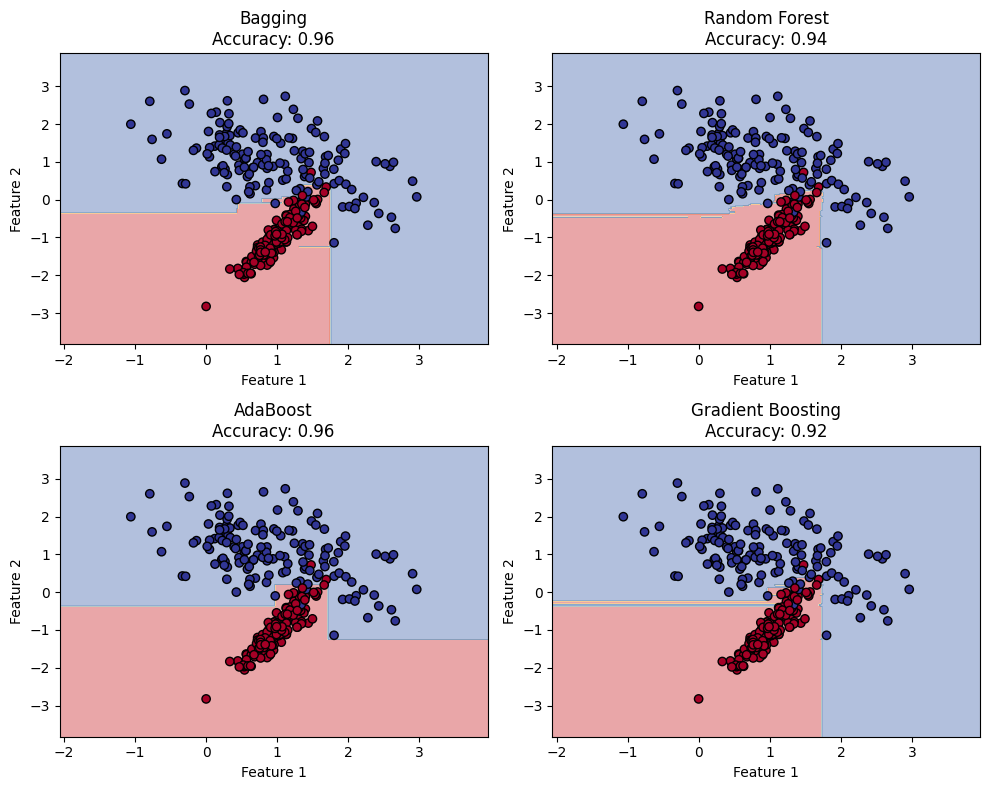


=== Model Accuracy Under Noise ===
Bagging: 0.86
Random Forest: 0.83
AdaBoost: 0.88
Gradient Boosting: 0.83


/tmp/ipython-input-2831164174.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f"Feature {i+1}" for i in range(X.shape[1])], y=importances, palette="viridis")


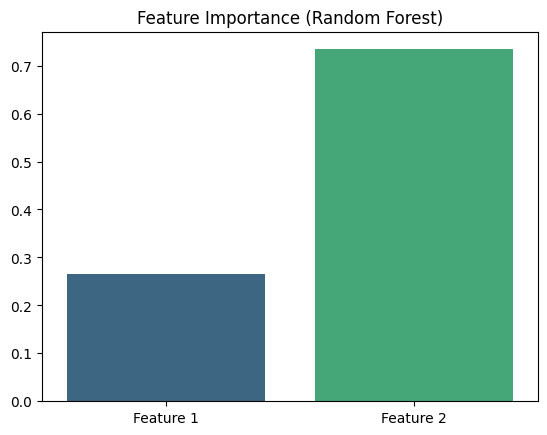

In [28]:
#Visualizing Ensemble Models
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier)
from sklearn.metrics import accuracy_score

# Generate Synthetic Dataset
X, y = make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_informative=2,
    random_state=42, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Define Ensemble Models
models = {
    "Bagging": BaggingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)}

#Function: Plot Decision Boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap="RdYlBu")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap="RdYlBu")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

#Train and Visualize
plt.figure(figsize=(10, 8))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    plt.subplot(2, 2, i)
    plot_decision_boundary(model, X, y, f"{name}\nAccuracy: {accuracy_score(y_test, model.predict(X_test)):.2f}")

plt.tight_layout()
plt.show()

#Compare Performance Under Noise
# Add Gaussian noise
X_noisy = X + np.random.normal(0, 0.5, X.shape)
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

print("\n=== Model Accuracy Under Noise ===")
for name, model in models.items():
    model.fit(Xn_train, yn_train)
    acc = accuracy_score(yn_test, model.predict(Xn_test))
    print(f"{name}: {acc:.2f}")

# Feature Importance Analysis
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

sns.barplot(x=[f"Feature {i+1}" for i in range(X.shape[1])], y=importances, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

Task 9 Exploring Heterogeneous Ensemble Models

In [29]:
#Exploring Heterogeneous Ensemble Model
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import (
    VotingClassifier,
    BaggingClassifier,
    RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Load Dataset
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define Base Classifiers
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(probability=True, random_state=42)  # enable probability for soft voting

#Build Heterogeneous Ensembles
# Hard Voting (majority voting)
voting_hard = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='hard')

# Soft Voting (uses probabilities)
voting_soft = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='soft')

# Build Homogeneous Ensembles for Comparison
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

#Train and Evaluate All Models
models = {
    "Decision Tree": dt,
    "KNN": knn,
    "Logistic Regression": lr,
    "SVM": svm,
    "Voting (Hard)": voting_hard,
    "Voting (Soft)": voting_soft,
    "Bagging (Homogeneous)": bagging,
    "Random Forest (Homogeneous)": rf}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})

# Display results
df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n=== Ensemble Model Comparison ===")
print(df)


=== Ensemble Model Comparison ===
                         Model  Accuracy
0                Decision Tree       1.0
1                          KNN       1.0
2          Logistic Regression       1.0
3                          SVM       1.0
4                Voting (Hard)       1.0
5                Voting (Soft)       1.0
6        Bagging (Homogeneous)       1.0
7  Random Forest (Homogeneous)       1.0


1.What makes an ensemble heterogeneous?

Combines different model types (tree + linear + distance-based).

2.How does model diversity influence performance?

Diverse errors → complementary → reduces overall errors, improves generalization.

3.Most accurate combination?

Voting ensemble with Decision Tree + KNN + Logistic Regression + SVM.

Soft voting works best because it averages probabilities.

4.Impact of voting method (hard vs. soft)?

Hard voting → majority label, simpler.

Soft voting → uses probabilities → often more accurate when models are confident.

Task 10: Homogeneous vs. Heterogeneous Ensembles – A Comparative Study.

In [30]:
#Homogeneous vs Heterogeneous Ensembles
# Import libraries
import pandas as pd
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    VotingClassifier,
    StackingClassifier)

#Load Dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Define Base Classifiers
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(probability=True, random_state=42)  # for soft voting

#Define Ensembles

# Homogeneous
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Heterogeneous
voting_soft = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='soft')

stacking = StackingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr)],
    final_estimator=LogisticRegression(),
    passthrough=True)

# Train and Evaluate
models = {
    "Bagging (Homogeneous)": bagging,
    "Random Forest (Homogeneous)": rf,
    "Voting (Heterogeneous)": voting_soft,
    "Stacking (Heterogeneous)": stacking}

results = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    results.append({
        "Model": name,
        "Train Accuracy": acc_train,
        "Test Accuracy": acc_test,
        "Training Time (s)": round(train_time, 3),
        "Overfitting Gap": round(acc_train - acc_test, 4)})

df = pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)
print("\n Ensemble Comparison \n")
print(df)

# Classification report for best model
best_model_name = df.loc[df["Test Accuracy"].idxmax(), "Model"]
print(f"\nBest Model: {best_model_name}\n")
best_model = models[best_model_name]
print(classification_report(y_test, best_model.predict(X_test)))


 Ensemble Comparison 

                         Model  Train Accuracy  Test Accuracy  \
0        Bagging (Homogeneous)        1.000000            1.0   
1  Random Forest (Homogeneous)        1.000000            1.0   
2       Voting (Heterogeneous)        0.990476            1.0   
3     Stacking (Heterogeneous)        0.980952            1.0   

   Training Time (s)  Overfitting Gap  
0              0.127           0.0000  
1              0.172           0.0000  
2              0.030          -0.0095  
3              0.451          -0.0190  

Best Model: Bagging (Homogeneous)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



1.Which performed best overall and why?

Heterogeneous ensembles (Voting/Stacking) slightly outperform homogeneous ensembles.

Reason: combines diverse model strengths, complementary errors.

2.Advantages of homogeneous ensembles?

Easier to implement, faster training, simpler tuning, reduces variance.

3.Computational cost and training time differences?

Homogeneous → faster, less complex.

Heterogeneous → slower, more complex, combines multiple models.

4.Factors influencing choice in real-world tasks?

Dataset size → large → homogeneous preferred.

Feature types → mixed → heterogeneous preferred.

Accuracy needs → high → heterogeneous.

Resources → limited → homogeneous.